<a href="https://colab.research.google.com/github/l0ngg/diveintocode/blob/master/gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#[Problem 1] Linear function
import numpy as np

x = np.array([ i-50 for i in range(101)])

y = (x*1/2 + 1)

print("The x array ranges from -50 to 50:\n",x)
print("The y array thats follow the formula of x*1/2 + 1:\n",y)

The x array ranges from -50 to 50:
 [-50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33
 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15
 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50]
The y array thats follow the formula of x*1/2 + 1:
 [-24.  -23.5 -23.  -22.5 -22.  -21.5 -21.  -20.5 -20.  -19.5 -19.  -18.5
 -18.  -17.5 -17.  -16.5 -16.  -15.5 -15.  -14.5 -14.  -13.5 -13.  -12.5
 -12.  -11.5 -11.  -10.5 -10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5
  -6.   -5.5  -5.   -4.5  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5
   0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  1

In [8]:
#[Problem 2] Array combination
arr = np.array([ [x[i],y[i]] for i in range(101)])
print( "The resulting array has the shape of:",arr.shape)

The resulting array has the shape of: (101, 2)


In [9]:
#[Problem 3] Find the gradient
x_change = x[1:] - x[:-1]
y_change = y[1:] - y[:-1]

gradient = np.array( [ ((y[i+1] - y[i]) / (x[i+1] - x[i])) for i in range( len(x)-1 )])

print(gradient)
print(gradient.shape)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
(100,)


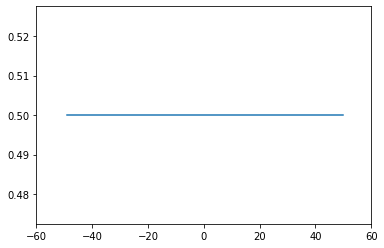

In [10]:
##[Problem 4] Draw a graph
import matplotlib.pyplot as plt

plt.plot(np.delete(x,0,0),gradient)
plt.xlim(-60,60)
plt.show()

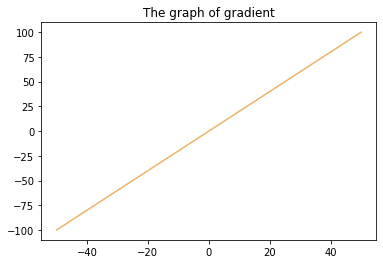

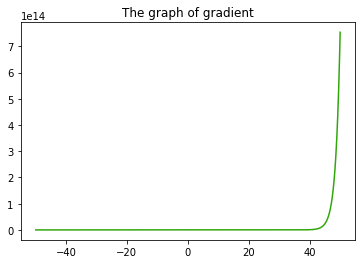

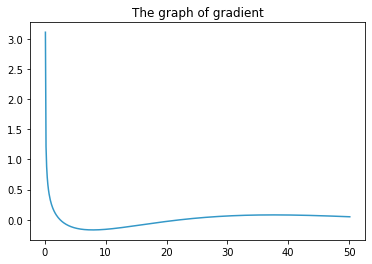

In [11]:
##[Problem 5] Python functionalization
import random

def compute_gradient(infunction, x_range=(-50, 50.1, 0.1)):
  """
  Calculate the gradient using the amount of change.
  Parameters
  ----------------
  function : function
    The function you want to find, the one that returns the ndarray of y when you put the ndarray of x.
  x_range : tuple
    Specify the range in the same way as the argument of np.arange ().
  Returns
  ----------------
  array_xy : ndarray, shape(n, 2)
    A combination of x and y. n depends on x_range.
  gradient : ndarray, shape(n-1,)
    Function gradient. One factor is reduced to make a difference
  """
  limit = int( (x_range[1] - x_range[0] ) / x_range[2] +1)

  x_arr = np.array([ ( x_range[0] + (i*x_range[2]) ) for i in range(limit)])
  y_arr = infunction(x_arr)

  array_xy = np.array([ [x_arr[i],y_arr[i]] for i in range( len(x_arr) )])
  gradient = np.array( [ ( (y_arr[i+1] - y_arr[i]) / (x_arr[i+1] - x_arr[i]) ) for i in range( len(x_arr)-1 )])

  plt.plot( np.delete(x_arr,0,0) , gradient, color=(random.random(),random.random(),random.random()))
  plt.title("The graph of gradient")
  plt.show()

  return array_xy, gradient

def function1(array_x):
  return np.array(array_x**2)

def function2(array_x):
  return np.array(2*(array_x**2) + 2**(array_x))

def function3(array_x):
  return np.array(np.sin(array_x**(1/2)))

array_1, gradient_1 = compute_gradient(function1)
array_2, gradient_2 = compute_gradient(function2)
array_3, gradient_3 = compute_gradient(function3, (0, 50.1 ,0.1) )

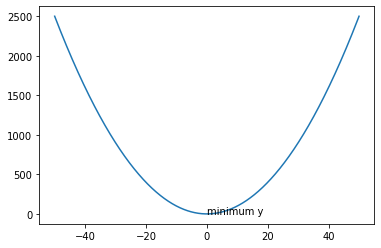

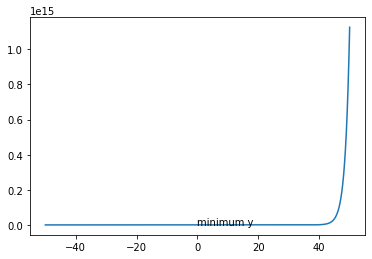

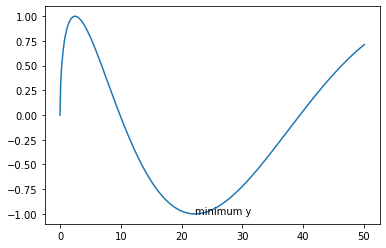

In [14]:
##[Problem 6] Find the minimum value
min_x = (np.argmin(array_1[:,1]))
min_y = np.min(array_1[:,1])
plt.plot( array_1.T[0], array_1.T[1])
plt.annotate("minimum y",( array_1[min_x][0], min_y ))
plt.show()

min_x = (np.argmin(array_2[:,1]))
min_y = np.min(array_2[:,1])
plt.plot( array_2.T[0], array_2.T[1])
plt.annotate("minimum y",( array_2[min_x][0], min_y ))
plt.show()

min_x = (np.argmin(array_3[:,1]))
min_y = np.min(array_3[:,1])
plt.plot( array_3.T[0], array_3.T[1])
plt.annotate("minimum y",( array_3[min_x][0], min_y ))
plt.show()